<a href="https://colab.research.google.com/github/devonreing/AI/blob/main/HW7/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Load google drive files so they are accesible in colab
#drive.mount('/content/drive/MyDrive')

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AI_ML_Datasets/nasa_asteroid.csv')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

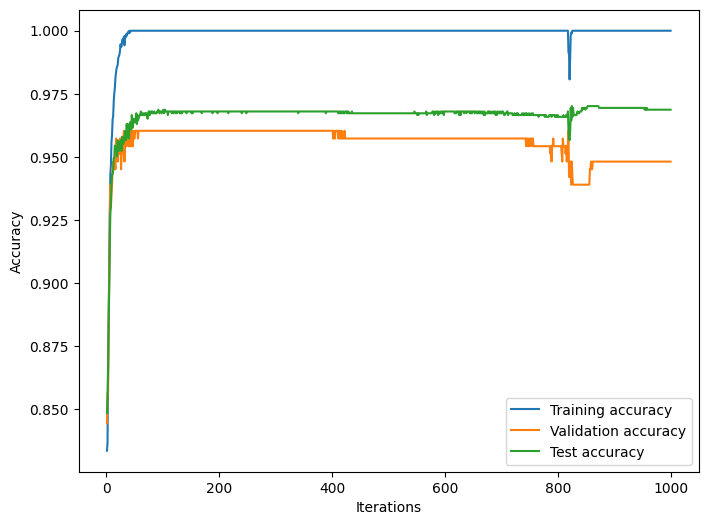

In [20]:
# drop any non-numerical data and any duplicate data in differing units
data = data.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Orbiting Body', 'Orbit Determination Date', 'Equinox', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)'], axis=1)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset into training, validation, and testing sets -- randomly shuffle the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Standardize the data values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)
#y_train_scaled = scaler.fit_transform(y_train)
#y_test_scaled = scaler.fit_transform(y_test)
#y_val_scaled = scaler.fit_transform(y_val)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train_scaled, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train_scaled, y_train))
    val_accuracies.append(mlp.score(X_val_scaled, y_val))
    test_accuracies.append(mlp.score(X_test_scaled, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

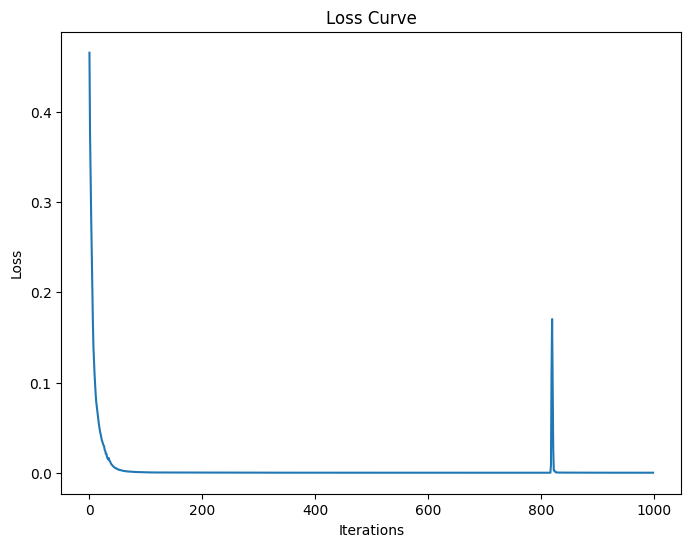

In [21]:
#@title Display the loss curve of the model

plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

In [22]:
#@title Information about the weights and biases of the trained model

for i, coef in enumerate(mlp.coefs_):
    print(f"Layer {i} - Weight matrix shape: {coef.shape}")

print()

for i, intercept in enumerate(mlp.intercepts_):
    print(f"Layer {i} - Intercept vector shape: {intercept.shape}")

Layer 0 - Weight matrix shape: (26, 50)
Layer 1 - Weight matrix shape: (50, 50)
Layer 2 - Weight matrix shape: (50, 50)
Layer 3 - Weight matrix shape: (50, 1)

Layer 0 - Intercept vector shape: (50,)
Layer 1 - Intercept vector shape: (50,)
Layer 2 - Intercept vector shape: (50,)
Layer 3 - Intercept vector shape: (1,)


In [23]:
#@title Calculate the overall training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

# Print the overall training and test accuracies
print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.8336720867208672
Overall Test Accuracy: 0.8486140724946695


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


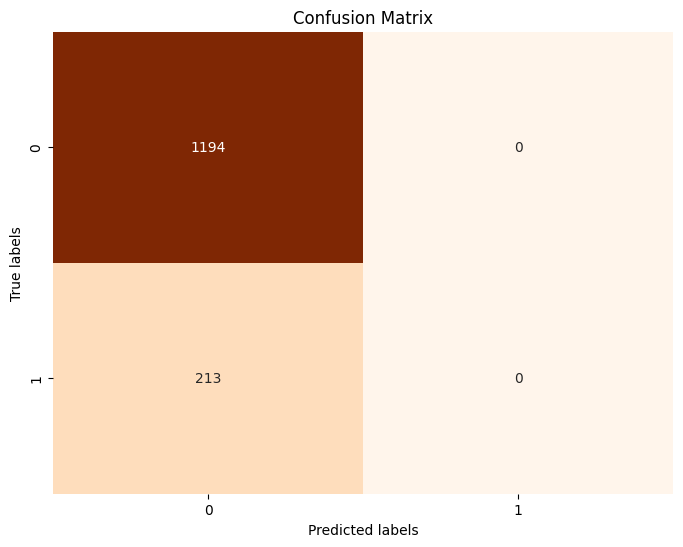

In [24]:
#@title Display the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()